Import required modules

In [36]:
import numpy as np
import requests
import math
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Method to load trainingimage and test image data, Replace ' ' with 0 and #, + with 1

---



In [37]:
def load_training_test_image_data(data_URL,image_count):
  train_data = requests.get(data_URL)
  train_data_list = list(map(list,train_data.text.splitlines()))
  # loop to iterate over training image data and replace '' with 0 and #,+ with 1
  for i,j in enumerate(train_data_list):
    for count, element in enumerate(j):
      if ' ' in element:
        train_data_list[i][count] = 0
      if '+' in element:
        train_data_list[i][count] = 1
      if '#' in element:
        train_data_list[i][count] = 1
  training_arr = np.array(train_data_list)
  training_images_input = np.vsplit(training_arr, image_count)
  training_images_array=np.array(training_images_input)
  return training_images_array


Method definition to load test label and training label data

In [38]:
def load_train_test_label_data(data_URL):
  #load data in to a numpy array
  label_data = np.loadtxt(data_URL,dtype = object)
  return label_data

Load Datasets to arrays using above defined methods

In [39]:
training_label_path = "https://raw.githubusercontent.com/Anusha-Kanagala/Machine-Learning---Neural-Networks-/master/Digit%20Interpretation/digitdata/traininglabels.txt"
training_img_path = "https://raw.githubusercontent.com/Anusha-Kanagala/Machine-Learning---Neural-Networks-/master/Digit%20Interpretation/digitdata/trainingimages.txt"
test_label_path = "https://raw.githubusercontent.com/Anusha-Kanagala/Machine-Learning---Neural-Networks-/master/Digit%20Interpretation/digitdata/testlabels.txt"
test_img_path = "https://raw.githubusercontent.com/Anusha-Kanagala/Machine-Learning---Neural-Networks-/master/Digit%20Interpretation/digitdata/testimages.txt"
training_images = load_training_test_image_data(training_img_path,5000)
training_label_data = load_train_test_label_data(training_label_path)
test_images = load_training_test_image_data(test_img_path,1000)
test_label_data = load_train_test_label_data(test_label_path)

Method to get total count of each element from training label data array to find prior probability

In [40]:
def individual_count_of_training_label_data(training_label_data):
  training_label_dict ={}
  #loop to get the count of each class in the training label data 
  for i in training_label_data:
    k=None
    if i in training_label_dict:
      k = training_label_dict[i] + 1
    else: 
      k = 1
    training_label_dict[i] = k
  return training_label_dict

training_label_count_dict = individual_count_of_training_label_data(training_label_data) 

Method to get unique element list of training data to find prior probability and store it in a dictionary

In [41]:
def get_unique_training_list(training_label_data):
  unique_list = []
  for i in training_label_data:
    # checks if exists in unique_list or not
    if i not in unique_list:
      unique_list.append(i)
  return unique_list 

unique_training_label_list = get_unique_training_list(training_label_data)

Method to calculate prior probability of each element in the training label data

In [42]:
def get_prior_probability():
  prior_probability ={}
  #Loop to find the prior probability for each class and store it in a dictionary
  for i in unique_training_label_list:
    count_i = training_label_count_dict[i]
    prior_probability[i] = count_i/len(training_label_data)
  return prior_probability

prior_probability_dict = get_prior_probability()


Training: Calculate zeros for each class image at each pixel position

In [43]:
dict_zero_count_matrix ={}
k =0
#loop to create a dictionary to store the zero count probability matrix
for i in training_images:
  x = None
  if training_label_data[k] in dict_zero_count_matrix:
    x = dict_zero_count_matrix[training_label_data[k]]
  else:
    x = np.zeros((28,28), dtype=int)

  for ix,iy in np.ndindex(i.shape):
      if i[ix,iy]== 0:
        x[ix,iy] = x[ix,iy] + 1
  dict_zero_count_matrix[training_label_data[k]] = x
  k = k + 1

use laplace constant lc and calculate feature probabilities at each position

In [44]:
dict_matrix_zero_prob ={}
dict_matrix_one_prob ={}

lc = 1
# compute zero and one probability matrix for each class
for k,v in dict_zero_count_matrix.items():
  matrix_zero_probability = np.zeros((28,28))
  matrix_one_probability = np.zeros((28,28))
  count = training_label_count_dict[k]

#add laplace constant to each value overcome underflow error
  for ix,iy in np.ndindex(v.shape):
    matrix_zero_probability[ix,iy] =  (lc + v[ix,iy]) / ((2* lc) + count) 
    matrix_one_probability[ix,iy] = (count - v[ix,iy] + lc )/ ((2 * lc) + count)
  dict_matrix_zero_prob[k] = matrix_zero_probability
  dict_matrix_one_prob[k] = matrix_one_probability

Classification of data and calculate posterior probability for each class

In [45]:
dict_posterior_probability = {}
cnt = 0
predictions=[]
#Classifying each image, to predict the digit value
for image in test_images:
  #finding posterior probablilty for given class(0,9)
  for cls in range(0,10):
    val = 0
    for ix,iy in np.ndindex(image.shape):
      if image[ix][iy] == 0: 
        val += math.log(dict_mat_zero_prob[str(cls)][ix,iy])
      else:
        val += math.log(dict_mat_one_prob[str(cls)][ix,iy])
    val += math.log(prior_probability_dict[str(cls)])
    dict_posterior_probability[cls] = val
    max = -999999
    predict = None
  # find the class with Max value to pick the prediction for current Image   
  for k,v in dict_posterior_probability.items():
    if v > max:
        max = v
        predict = k
  predictions.append(str(predict))
  cnt = cnt + 1

Accuracy and confusion matrix

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
c_matrix = confusion_matrix(test_label_data, predictions)
print("Confusion Matrix: \n")
print(c_matrix)
Accuracy_score = accuracy_score(test_label_data, predictions)
print(f'\n Accuracy score:  {Accuracy_score}')

Confusion Matrix: 

[[ 76   0   1   0   1   5   3   0   4   0]
 [  0 104   1   0   0   2   1   0   0   0]
 [  1   3  80   4   1   0   6   1   5   2]
 [  0   2   0  79   0   3   2   6   2   6]
 [  0   1   0   0  82   0   3   1   2  18]
 [  2   2   1  12   3  62   1   1   2   6]
 [  1   6   4   0   4   5  69   0   2   0]
 [  0   6   3   0   3   0   0  77   3  14]
 [  2   1   3  14   2   6   0   1  62  12]
 [  1   1   1   3   9   2   0   2   1  80]]

 Accuracy score:  0.771


I have tried using other laplace constant values, for most of them (0.1,0.5,10) the accuaracy score was around 0.77. But for other values(15,19) it was close to 0.75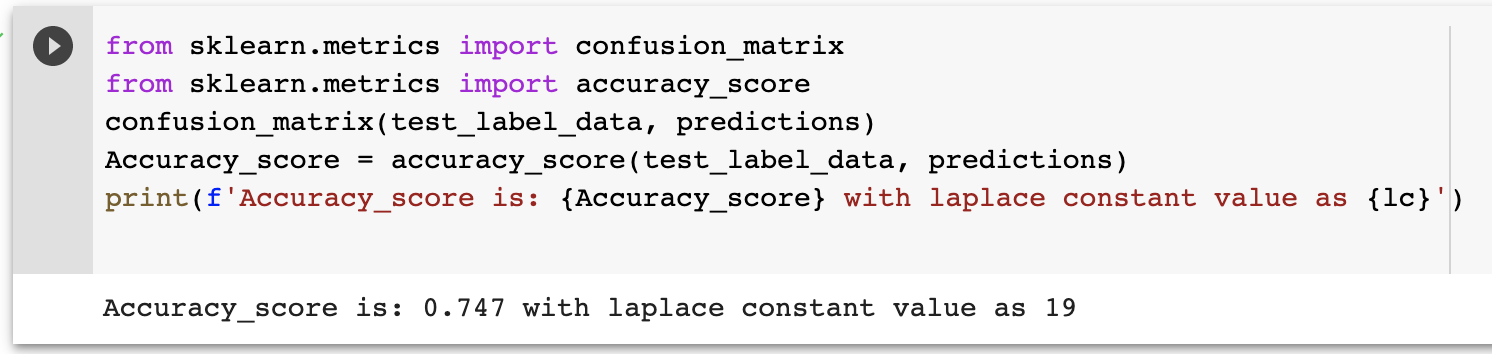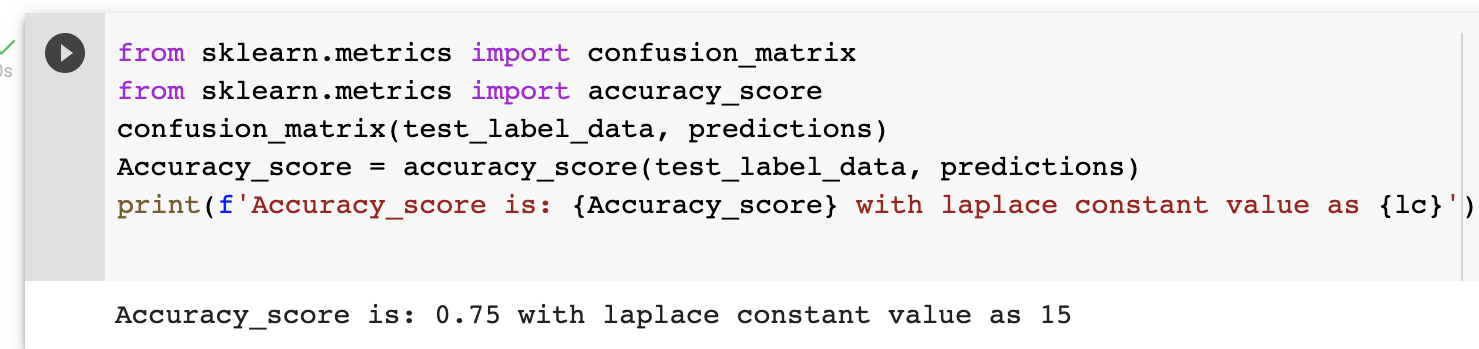

---



I have also tried to shuffle training mages and training label data (using below mentioned code) but there was no change in the accuracy with laplace constant as 1
training_images, training_label_data = shuffle(training_images, training_label_data)